## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0804 13:54:19.547639 15056 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 13:54:19.551635 15056 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 13:54:19.626726 15056 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 13:54:19.628724 15056 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backe

Experiment with LR = 0.100000


W0804 13:54:19.914000 15056 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total para

W0804 13:54:20.223818 15056 deprecation.py:323] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 414us/step - loss: 2.1072 - acc: 0.2057 - val_loss: 1.9093 - val_acc: 0.2786
Epoch 2/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.8435 - acc: 0.3131 - val_loss: 1.7375 - val_acc: 0.3679
Epoch 3/50
50000/50000 [==============================] - 20s 406us/step - loss: 1.7556 - acc: 0.3663 - val_loss: 1.7733 - val_acc: 0.3625
Epoch 4/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.6999 - acc: 0.3905 - val_loss: 1.7109 - val_acc: 0.3850 1.6993 - ac 
Epoch 5/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.6689 - acc: 0.4036 - val_loss: 1.6777 - val_acc: 0.4055
Epoch 6/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.6398 - acc: 0.4173 - val_loss: 1.6582 - val_acc: 0.4106
Epoch 7/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.6108 - acc: 0.4289 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.8927 - acc: 0.3147 - val_loss: 1.7299 - val_acc: 0.3791
Epoch 2/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.6310 - acc: 0.4166 - val_loss: 1.5473 - val_acc: 0.4469
Epoch 3/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.5395 - acc: 0.4508 - val_loss: 1.5280 - val_acc: 0.4555
Epoch 4/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.4731 - acc: 0.4773 - val_loss: 1.4944 - val_acc: 0.4656
Epoch 5/50
50000/50000 [==============================] - 20s 390us/step - loss: 1.4285 - acc: 0.4918 - val_loss: 1.5636 - val_acc: 0.4449
Epoch 6/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.3910 - acc: 0.5026 - val_loss: 1.4210 - val_acc: 0.4897
Epoch 7/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.3571 - acc: 0.5170 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 397us/step - loss: 2.1529 - acc: 0.2133 - val_loss: 1.9521 - val_acc: 0.3084
Epoch 2/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.8531 - acc: 0.3420 - val_loss: 1.7765 - val_acc: 0.3766
Epoch 3/50
50000/50000 [==============================] - 20s 392us/step - loss: 1.7370 - acc: 0.3869 - val_loss: 1.7164 - val_acc: 0.3908
Epoch 4/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.6681 - acc: 0.4098 - val_loss: 1.6462 - val_acc: 0.4171
Epoch 5/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.6136 - acc: 0.4302 - val_loss: 1.5946 - val_acc: 0.4330
Epoch 6/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.5677 - acc: 0.4442 - val_loss: 1.5931 - val_acc: 0.4325
Epoch 7/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.5299 - acc: 0.4587 - val_loss: 1.

_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.2857 - acc: 0.1251 - val_loss: 2.2546 - val_acc: 0.1672
Epoch 2/50
50000/50000 [==============================] - 19s 374us/step - loss: 2.2292 - acc: 0.1790 - val_loss: 2.2006 - val_acc: 0.2040
Epoch 3/50
50000/50000 [==============================] - 20s 393us/step - loss: 2.1749 - acc: 0.2129 - val_loss: 2.1476 - val_acc: 0.224959 - acc: 0.212 - ETA: 0s - loss: 2.1758 - acc: 0
Epoch 4/50
50000/50000 [==============================] - 20s 399us/step - loss: 2.1228 - acc: 0.2304 - val_loss: 2.0960 - val_acc: 0.2418
Epoch 5/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.0734 - acc: 0.2436 - val_loss: 2.0487 - val_acc: 0.2557
Epoch 6/50
50000/50000 [==============================] - 19s 390us/step - loss: 2.0285 - acc: 0.2596 - val_loss: 2.0067 - val_acc: 0.2742
E

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 349us/step - loss: 2.3335 - acc: 0.1080 - val_loss: 2.3141 - val_acc: 0.1126
Epoch 2/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.3072 - acc: 0.1198 - val_loss: 2.3017 - val_acc: 0.1316
Epoch 3/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.2983 - acc: 0.1366 - val_loss: 2.2948 - val_acc: 0.1426
Epoch 4/50
50000/50000 [==============================] - 17s 340us/step - loss: 2.2918 - acc: 0.1440 - val_loss: 2.2886 - val_acc: 0.1519
Epoch 5/50
50000/50000 [==============================] - 17s 336us/step - loss: 2.2856 - acc: 0.1497 - val_loss: 2.2822 - val_acc: 0.1552
Epoch 6/50
50000/50000 [==============================] - 18s 365us/step - loss: 2.2790 - acc: 0.1543 - val_loss: 2.2753 - val_acc: 0.1593ss: 2.2791
Epoch 7/50
50000/50000 [==============================] - 19s 371us/step - loss: 2.2715 - acc: 0.1590 - va

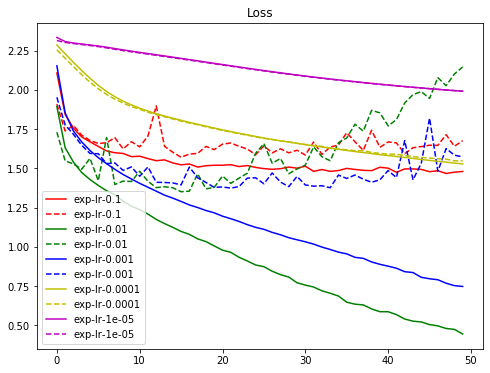

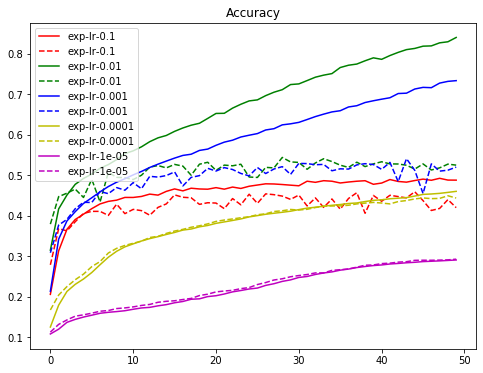

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()